In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

# Bitwise Operations on Images

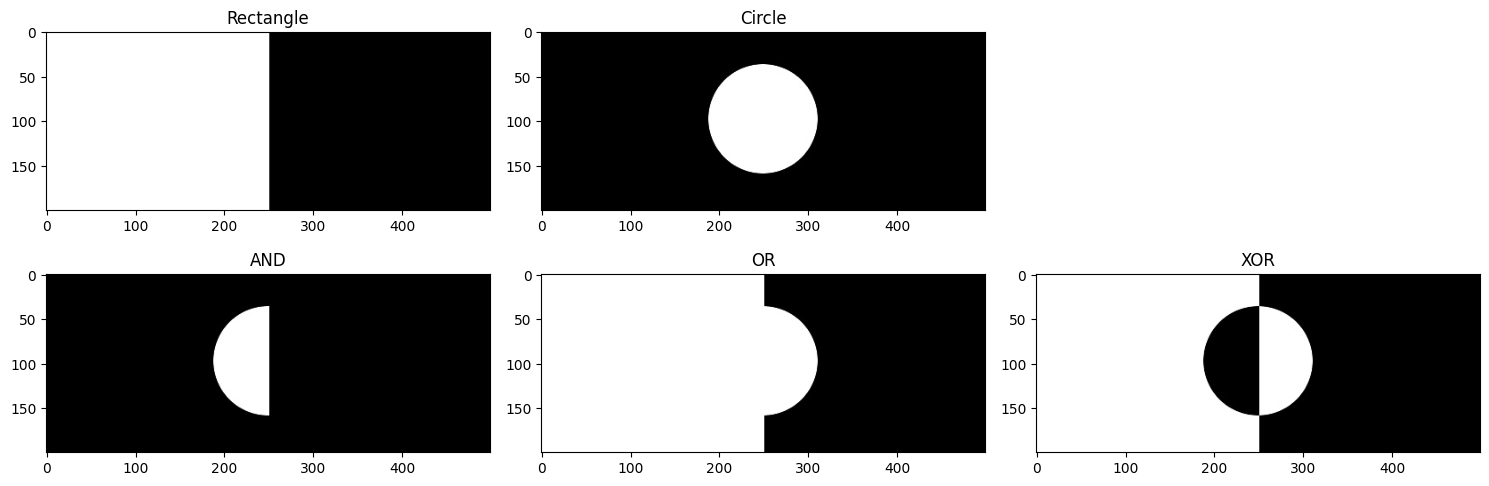

Shape of rectangle image: (200, 499)
Shape of circle image: (200, 499)


In [2]:
img_rec = cv2.imread('../data/rectangle.jpg',cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread('../data/circle.jpg',cv2.IMREAD_GRAYSCALE)
and_img = cv2.bitwise_and(img_rec,img_cir)
or_img = cv2.bitwise_or(img_rec,img_cir)
xor_img = cv2.bitwise_xor(img_rec,img_cir)


fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0,0].imshow(img_rec, cmap='gray');   ax[0,0].set_title('Rectangle')
ax[0,1].imshow(img_cir,cmap='gray');    ax[0,1].set_title('Circle')
ax[0,2].axis('off')
ax[1,0].imshow(and_img,cmap='gray');    ax[1,0].set_title('AND')
ax[1,1].imshow(or_img,cmap='gray');     ax[1,1].set_title('OR')
ax[1,2].imshow(xor_img,cmap='gray');    ax[1,2].set_title('XOR')

plt.tight_layout()
plt.show()

print(f"Shape of rectangle image: {img_rec.shape}")
print(f"Shape of circle image: {img_cir.shape}")

## Logo Manipulation

Text(0.5, 1.0, 'Background, shape: (900, 900, 3)')

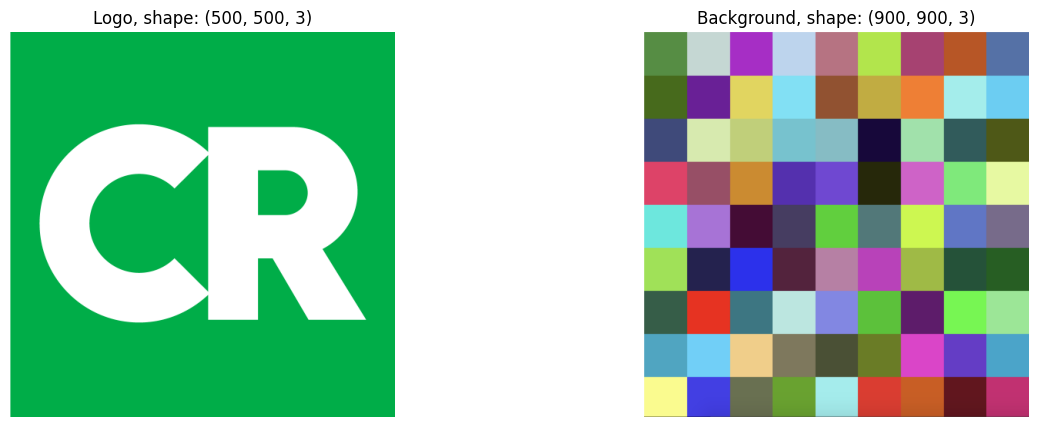

In [3]:
logo = '../data/CR_Logo.png'
logo = cv2.imread(logo, cv2.IMREAD_COLOR)

bg = '../data/checkerboard_color.png'
bg = cv2.imread(bg, cv2.IMREAD_COLOR)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(logo[:,:,::-1]); ax[0].axis('off'); ax[0].set_title(f"Logo, shape: {logo.shape}")
ax[1].imshow(bg[:,:,::-1]); ax[1].axis('off'); ax[1].set_title(f"Background, shape: {bg.shape}")




**Create a mask from the logo iamge**

Text(0.5, 1.0, 'Inverted, shape: (500, 500)')

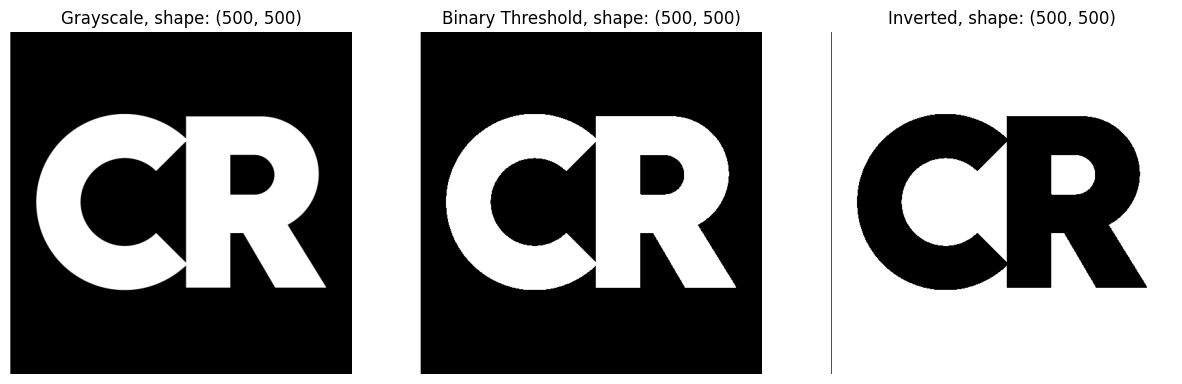

In [4]:
# Resize
bg = cv2.resize(bg, (logo.shape[1], logo.shape[0]))

# convert logo to grayscale
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)  

# Global thresholding
_, logo_bin = cv2.threshold(logo_gray, 150, 255, cv2.THRESH_BINARY)

# Invert the logo
logo_inv = cv2.bitwise_not(logo_bin)

fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(logo_gray,cmap='gray'); ax[0].axis('off'); ax[0].set_title(f"Grayscale, shape: {logo_gray.shape}")
ax[1].imshow(logo_bin,cmap='gray'); ax[1].axis('off'); ax[1].set_title(f"Binary Threshold, shape: {logo_bin.shape}")    
ax[2].imshow(logo_inv,cmap='gray'); ax[2].axis('off'); ax[2].set_title(f"Inverted, shape: {logo_inv.shape}")

Text(0.5, 1.0, 'Inverted # of Values: 2')

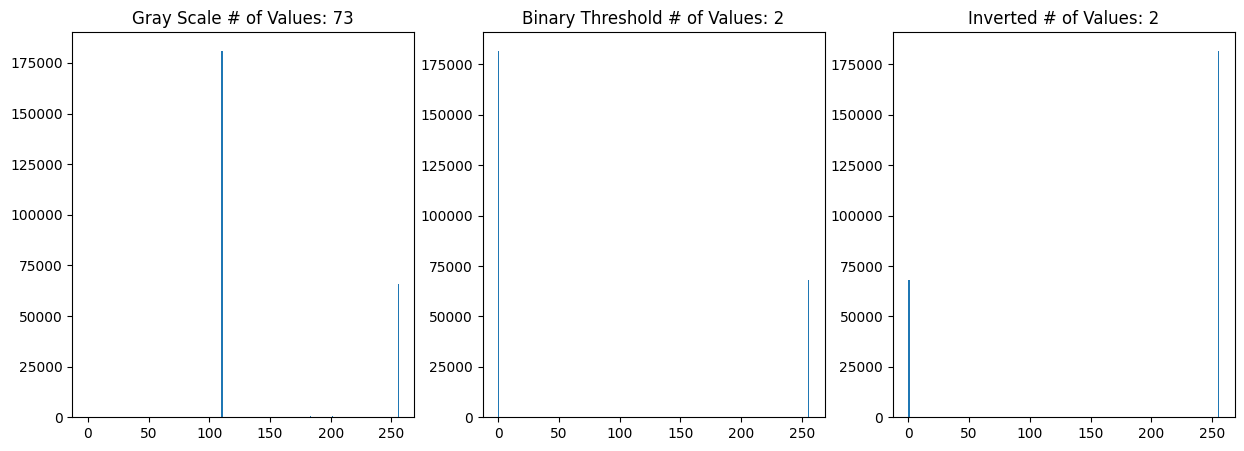

In [5]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].hist(logo_gray.flatten(),256,[0,256]); ax[0].set_title(f"Gray Scale # of Values: {len(np.unique(logo_gray))}")
ax[1].hist(logo_bin.flatten(),256,[0,256]); ax[1].set_title(f"Binary Threshold # of Values: {len(np.unique(logo_bin))}")   
ax[2].hist(logo_inv.flatten(),256,[0,256]); ax[2].set_title(f"Inverted # of Values: {len(np.unique(logo_inv))}")

[ 41  82  91 127 183 255]


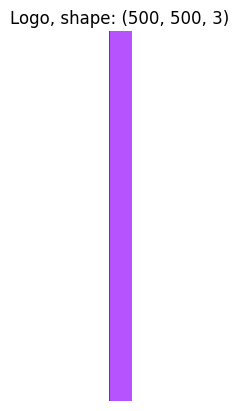

In [6]:
# Investigating if black vertical line was apart of the original image, which it is and indicated by the presence of 255 and maybe 183. 
plt.imshow(cv2.bitwise_not(logo[:,:30,:]),cmap='gray'); plt.axis('off'); plt.title(f"Logo, shape: {logo.shape}")
print(np.unique(cv2.bitwise_not(logo[:,:30,:])))

In [7]:
# Change pixel values to white in that area of the image
logo_inv[:, :30] = 255

Text(0.5, 1.0, 'Inverted, shape: (500, 500)')

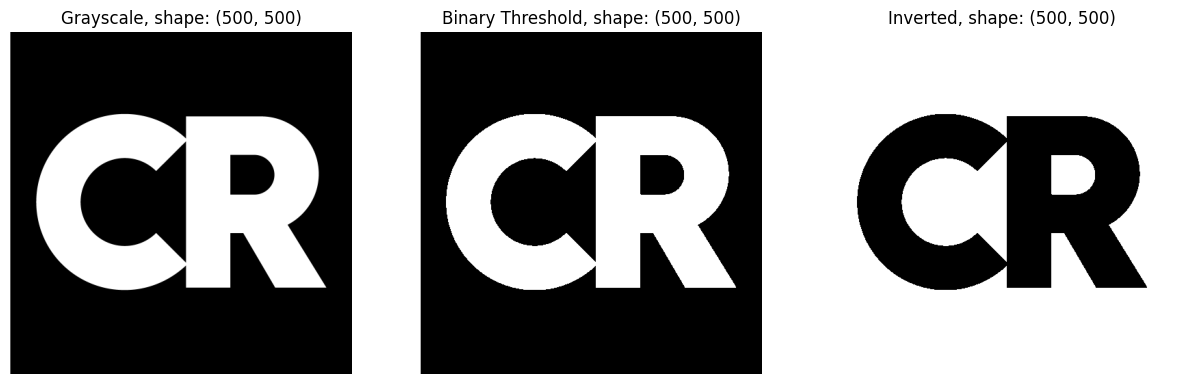

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(logo_gray,cmap='gray'); ax[0].axis('off'); ax[0].set_title(f"Grayscale, shape: {logo_gray.shape}")
ax[1].imshow(logo_bin,cmap='gray'); ax[1].axis('off'); ax[1].set_title(f"Binary Threshold, shape: {logo_bin.shape}")    
ax[2].imshow(logo_inv,cmap='gray'); ax[2].axis('off'); ax[2].set_title(f"Inverted, shape: {logo_inv.shape}")

Text(0.5, 1.0, 'Masked Logo, shape: (500, 500, 3)')

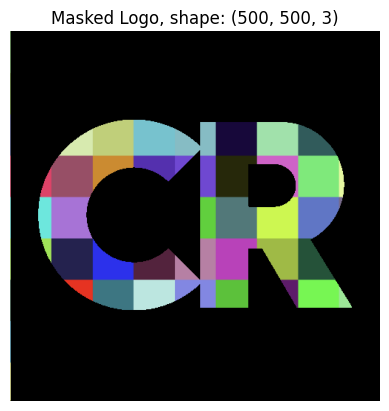

In [9]:
# Apply the mask to the back ground image using the inverted shape.
masked_logo = cv2.bitwise_and(bg, bg, mask=logo_bin)

plt.imshow(masked_logo[:,:,::-1]); plt.axis('off'); plt.title(f"Masked Logo, shape: {masked_logo.shape}")

Text(0.5, 1.0, 'Masked Background, shape: (500, 500, 3)')

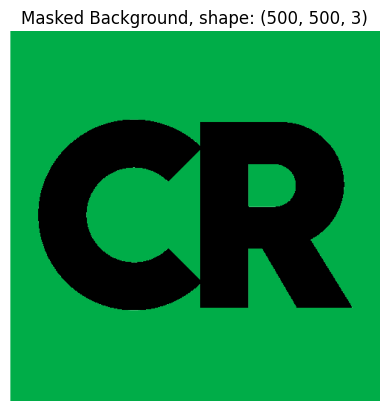

In [10]:
#Using the inverted mask and the logo, isolate the logo from the background
masked_bg = cv2.bitwise_and(logo, logo, mask=logo_inv)

plt.imshow(masked_bg[:,:,::-1]); plt.axis('off'); plt.title(f"Masked Background, shape: {masked_bg.shape}")

Text(0.5, 1.0, 'Final, shape: (500, 500, 3)')

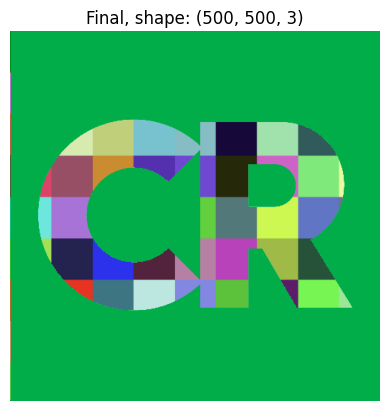

In [11]:
# Add the masked logo to the isolated
final = masked_logo + masked_bg

plt.imshow(final[:,:,::-1]); plt.axis('off'); plt.title(f"Final, shape: {final.shape}")

**Practice** 

Text(0.5, 1.0, 'Green, shape: (600, 600, 3)')

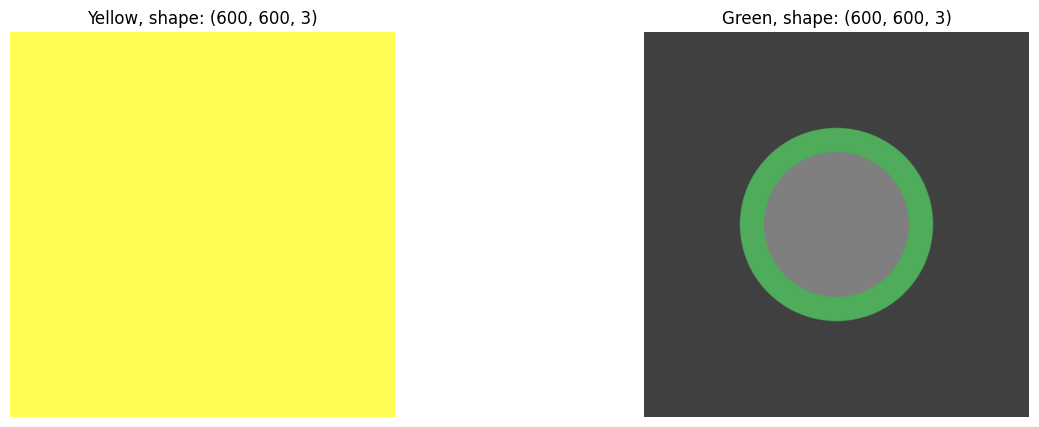

In [12]:
yellow = cv2.imread('../data/yellow_square.png', cv2.IMREAD_COLOR)
green = cv2.imread('../data/green_circle.png', cv2.IMREAD_COLOR)   

# Resize the green image to match the yellow image
green = cv2.resize(green, (yellow.shape[1], yellow.shape[0]))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(yellow[:,:,::-1]); ax[0].axis('off'); ax[0].set_title(f"Yellow, shape: {yellow.shape}")
ax[1].imshow(green[:,:,::-1]); ax[1].axis('off'); ax[1].set_title(f"Green, shape: {green.shape}")

Unique values in green image: [ 52  53  55  56  57  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  76  77  78  79  80  81  82  83  85  86  87  88  89  90  91  92
  93  95  96  98  99 100 101 102 103 104 105 106 107 108 109 112 114 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138]
shape of yellow image: (600, 600)
Unique values in thresholded image: [  0 255]
shape of thresholded image: (600, 600)


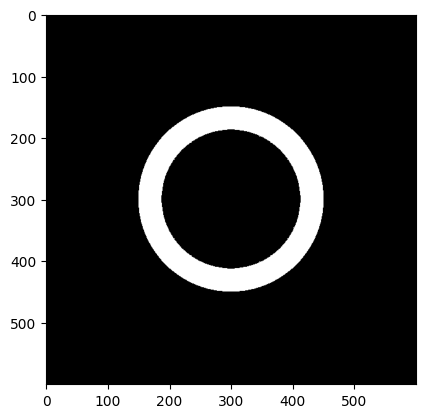

In [23]:
# Convert the yellow image to grayscale
green_gray = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)

print(f"Unique values in green image: {np.unique(green_gray)}")
print(f"shape of yellow image: {green_gray.shape}")

# plt.imshow(green_gray, cmap='gray')

# Global thresholding
_, green_bin = cv2.threshold(green_gray, 127, 255, cv2.THRESH_BINARY)

print(f"Unique values in thresholded image: {np.unique(green_bin)}")
print(f"shape of thresholded image: {green_bin.shape}")

plt.imshow(green_bin, cmap='gray')

# # Invert the yellow image
# yellow_inv = cv2.bitwise_not(yellow_bin)

# fig, ax = plt.subplots(1,3, figsize=(15, 5))
# ax[0].imshow(yellow_gray,cmap="gray"); ax[0].axis('off'); ax[0].set_title(f"Grayscale, shape: {yellow_gray.shape}")
# ax[1].imshow(yellow_bin,cmap='gray'); ax[1].axis('off'); ax[1].set_title(f"Binary Threshold, shape: {yellow_bin.shape}")
# ax[2].imshow(yellow_inv,cmap='gray'); ax[2].axis('off'); ax[2].set_title(f"Inverted, shape: {yellow_inv.shape}")



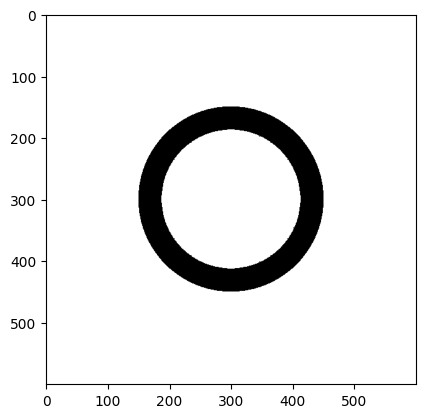

In [24]:
# inverse the Circle
green_inv = cv2.bitwise_not(green_bin)

plt.imshow(green_inv, cmap='gray')

Text(0.5, 1.0, 'Final, shape: (600, 600, 3)')

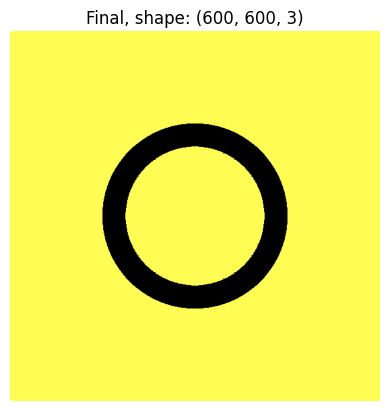

In [25]:
final = cv2.bitwise_and(yellow, yellow, mask=green_inv)

plt.imshow(final[:,:,::-1]); plt.axis('off'); plt.title(f"Final, shape: {final.shape}")